## Machine Learning Model 2: KMeans Clustering
Unsupervised clustering is used to identify distinct electricity usage patterns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/processed/electricity_consumption_cleaned.csv")
df.head()


,Month,City,Units_Consumed,Tariff_Rate,Electricity_Bill
0,10,Hyderabad,384,8.4,3225.6
1,5,Vadodara,488,7.8,3806.4
2,7,Shimla,416,7.7,3203.2
3,6,Mumbai,475,9.2,4370.0
4,2,Mumbai,457,9.2,4204.4


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             45345 non-null  int64  
 1   City              45345 non-null  object 
 2   Units_Consumed    45345 non-null  int64  
 3   Tariff_Rate       45345 non-null  float64
 4   Electricity_Bill  45345 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ MB


,Month,Units_Consumed,Tariff_Rate,Electricity_Bill
count,45345.000000,45345.000000,45345.000000,45345.000000
mean,6.488058,515.083207,8.369648,4311.771307
std,3.443252,122.618017,0.576992,1073.886406
min,1.000000,95.000000,7.400000,807.500000
25%,3.000000,429.000000,7.900000,3556.800000
50%,6.000000,515.000000,8.400000,4299.400000
75%,9.000000,601.000000,8.900000,5038.800000
max,12.000000,926.000000,9.300000,8286.300000


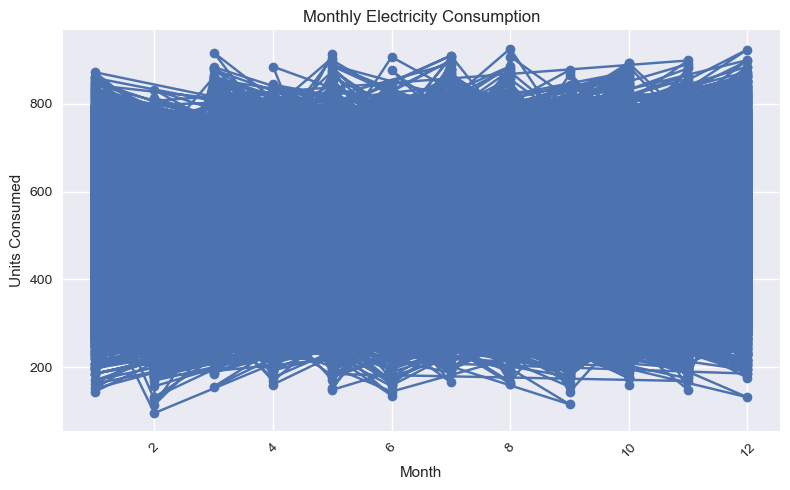

In [4]:
plt.figure(figsize=(8,5))
plt.plot(df['Month'], df['Units_Consumed'], marker='o')
plt.title("Monthly Electricity Consumption")
plt.xlabel("Month")
plt.ylabel("Units Consumed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


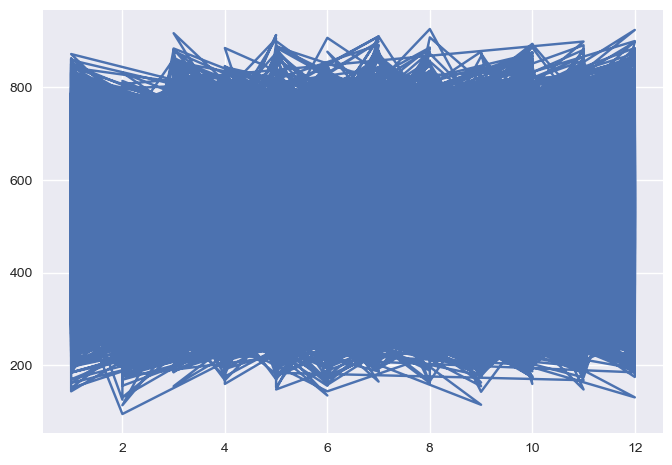

In [5]:
plt.plot(df['Month'], df['Units_Consumed'])


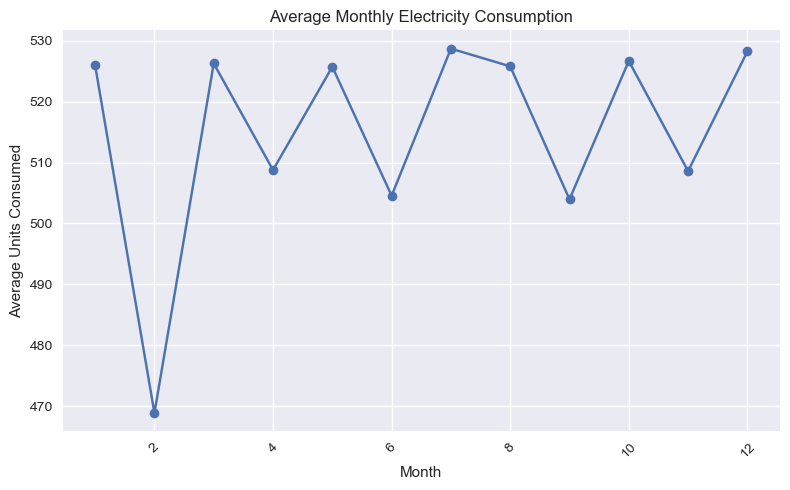

In [6]:
monthly_avg = df.groupby('Month')['Units_Consumed'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(monthly_avg['Month'], monthly_avg['Units_Consumed'], marker='o')
plt.title("Average Monthly Electricity Consumption")
plt.xlabel("Month")
plt.ylabel("Average Units Consumed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


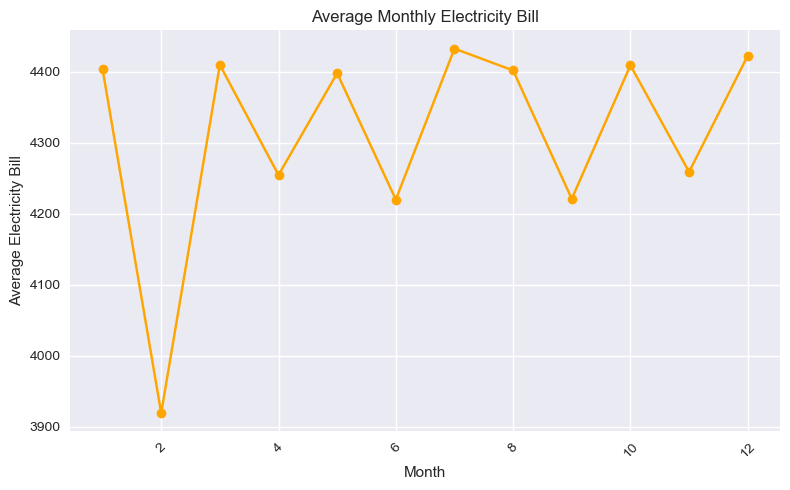

In [7]:
monthly_bill_avg = df.groupby('Month')['Electricity_Bill'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(monthly_bill_avg['Month'], monthly_bill_avg['Electricity_Bill'], marker='o', color='orange')
plt.title("Average Monthly Electricity Bill")
plt.xlabel("Month")
plt.ylabel("Average Electricity Bill")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


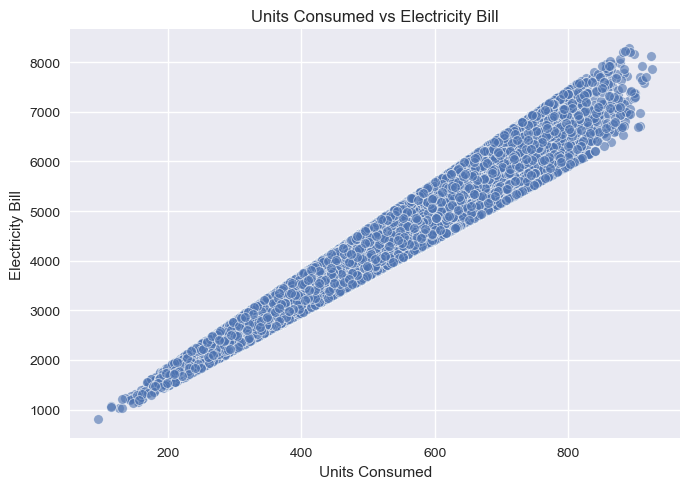

In [8]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=df,
    x='Units_Consumed',
    y='Electricity_Bill',
    alpha=0.6
)

plt.title("Units Consumed vs Electricity Bill")
plt.xlabel("Units Consumed")
plt.ylabel("Electricity Bill")
plt.tight_layout()
plt.show()


The scatter plot shows a positive relationship between electricity consumption
and billing amount, indicating that higher consumption generally results in
higher electricity bills. This supports the use of regression modeling.


## Machine Learning Model 1: Linear Regression
This model predicts electricity bill amount based on electricity consumption.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Features and target
X = df[['Units_Consumed']]
y = df['Electricity_Bill']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 256.3301048772463
R2 Score: 0.9177399353244406


The linear regression model captures the overall relationship between electricity
consumption and billing. Prediction errors indicate the effect of tariff structure
and other non-linear factors.


## Machine Learning Model 2: KMeans Clustering
Clustering is used to identify different electricity usage and billing patterns.


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_data = df[['Units_Consumed', 'Electricity_Bill']]

# Scale features
scaled_data = StandardScaler().fit_transform(cluster_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


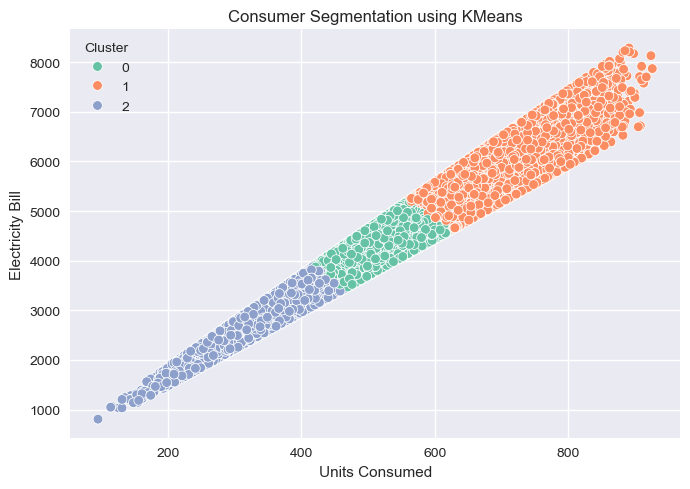

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Units_Consumed',
    y='Electricity_Bill',
    hue='Cluster',
    palette='Set2'
)
plt.title("Consumer Segmentation using KMeans")
plt.xlabel("Units Consumed")
plt.ylabel("Electricity Bill")
plt.tight_layout()
plt.show()


KMeans clustering reveals distinct consumer groups with similar electricity
consumption and billing behavior. These segments can support targeted tariff
planning and demand-side management.
